Let's begin with a flawed sampling strategy.

I want to generate random numbers from a uniform distribution on the unit right triangle, which has a constant pdf of 2 on $\Omega$.

* I generate n samples, $X_i$ from $\mathcal{U}(0,1)$.
* I generate n samples from $\mathcal{U}(0,1-X_i)$.

Note that all samples are certainly **in** the unit-right triangle.  But let's look at a histogram of the samples:

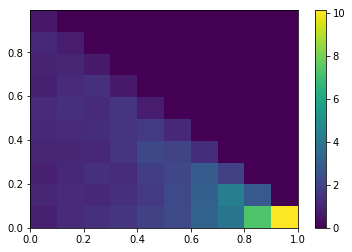

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

samples=10000
xc=np.random.rand(samples)
yc=(1-xc)*np.random.rand(samples)

plt.hist2d(xc,yc,normed=True)
plt.colorbar()
plt.show()


Whoops!  But this makes sense(think about the probability when $X=1$.)

Let's look at this from the standpoint of rejection sampling.


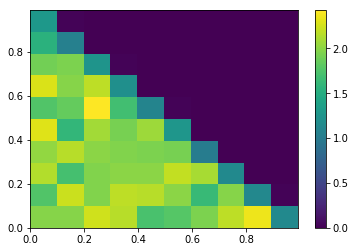

In [47]:
#generate 10,000 samples on the unit square from 

samp=np.random.rand(samples,2)
#index the ones in the unit square
flags=np.sum(samp,axis=1) <= 1
#slice out the accepted samples
acc_samp=samp[flags,:]

plt.hist2d(acc_samp[:,0],acc_samp[:,1],normed=True)
plt.colorbar()
plt.show()


# Markov Chain Monte Carlo example

$$
\int_\Omega xyz \sin (x + y + z) \ln (x + 2y +3z) \; d\Omega
$$
where $\Omega$ is the unit cube.

We want to do MC integration using $f_X ~ \sin(x+y+z)$.  But to draw from this distribution we will to M-H MCMC using a uniform proposal distribution.


0.152805331899
0.152891044649
(3, 10001)


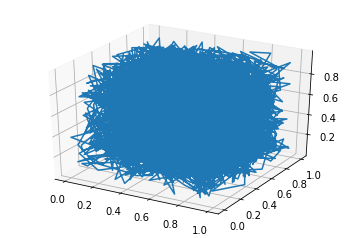

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

samples = 10000
normal= np.cos(3)-3*np.cos(2)+3*np.cos(1)-1
V=np.zeros(samples)
X = np.ones((3,1))/2
walker = X
for n in range(samples):
    Y = X + np.random.rand(3,1)/2-1/4
    if np.min(Y) > 0 and np.max(Y) < 1 and np.random.rand() < np.sin(np.sum(Y))/np.sin(sum(X)):
        X = Y
    V[n]=normal*np.prod(X)*np.log(np.dot(np.array([1,2,3]),X))
    walker = np.hstack((walker,X))
print(V.mean())
print(V[1000:].mean())
print(walker.shape)
ax.plot(walker[0],walker[1],walker[2])
plt.show()

The Rosenbrock family of functions is a frequently used test problem in nonlinear optimization and for testing sampling methods in UQ.

In 2D, it takes on the form:
$$
R(x)=(a-x)^2+b(y-x^2)^2,
$$
with $(a,b)$ often taken as (1,100).

Below we plot the 2D Rosenbrock function.

10000
b*(-x**2 + y)**2 + (a - x)**2


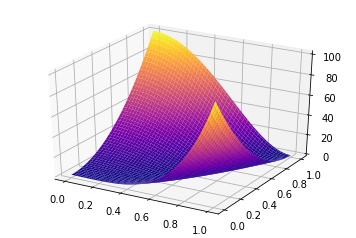

In [49]:
import sympy as sym
x,y,a,b=sym.symbols("x y a b")
rosen=(a-x)**2+b*(y-x**2)**2
evals=np.linspace(0,1,100)
xv,yv=np.meshgrid(evals,evals)
#nprosen=sym.lambdify((x,y),rosen.subs([(a,1),(b,100)]))

def nprosen(x1,x2,a1=1,a2=100):
    return (a1-x1)**2+a2*(x2-x1**2)**2

out=nprosen(xv,yv)
print(out.size)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv,yv,out,cmap='plasma')
print(rosen)

a**2 - a + b/5 + 1/3
2.71652084447
2.61941397161
(2, 10001)


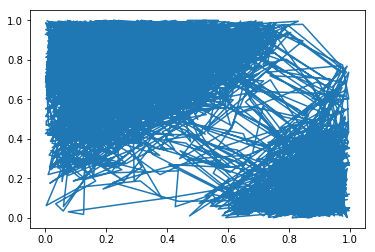

In [50]:
mean=sym.integrate(sym.integrate(rosen,(y,0,1)),(x,0,1))
print(mean)
normal=mean.subs(a,1)
normal=normal.subs(b,100)
normal=np.float(normal)

plt.figure()

def rosen(x,y,a=1,b=100):
    rosen=(a-x)**2+b*(y-x**2)**2
    return rosen

samples = 10000
V=np.zeros(samples)
X = np.ones((2,1))/2
walker = X
for n in range(samples):
    Y = X + np.random.rand(2,1)/2-1/4
    if np.min(Y) > 0 and np.max(Y) < 1 and np.random.rand() < rosen(Y[0],Y[1])/rosen(X[0],X[1]):
        X = Y
    V[n]=normal*np.prod(X)*np.log(np.dot(np.array([1,2]),X))
    walker = np.hstack((walker,X))
print(V.mean())
print(V[1000:].mean())
print(walker.shape)
plt.plot(walker[0],walker[1])
plt.show()